## Titanic - Machine Learning from Disaster

You can download the data from: https://www.kaggle.com/competitions/titanic/data

## Importing Libraries

In [220]:
import numpy as np # For numerical computation
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization (better that matplotlib)

from sklearn.model_selection import train_test_split # To split the dataset into train and test
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm

# For results evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, auc,  classification_report, confusion_matrix

## Importing the Dataset

In [221]:
# Import the dataset in a pandas dataframe
df = pd.read_csv("train.csv")

In [222]:
# Printing the dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [223]:
# List of the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [224]:
# Shape of the data frame
df.shape

(891, 12)

In [225]:
df.head() # For the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
df.tail()# The last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [227]:
df.sample(10) # Printing a random sample from the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S


In [228]:
df.info() # Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [229]:
df.describe() # Generate descriptive statistics of numerical data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [230]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [231]:
df.iloc[0] # iloc here is used to access the first row (remember the index starts from 0 to n-1)

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [232]:
df.loc[0] # loc here does the same thing as iloc

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [233]:
df['Age'] # To access one column

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [234]:
df[['Age', 'Survived']] # To access more than one column add [columns_list]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [235]:
df.loc[0, 'Pclass'] # loc is used to access by column name

3

In [236]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [237]:
df.iloc[0, 2] # iloc is used to access by column index

3

In [238]:
df.iloc[10:20, 3]

10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
Name: Name, dtype: object

In [239]:
df.loc[10:20, "Name"] # Note: in loc the stop index is included (from 10 to 20) but in iloc it is not included

10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
20                                 Fynney, Mr. Joseph J
Name: Name, dtype: object

### Data Preprocssing and EDA

#### Handling Missing Values

In [240]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<b>Note: </b> In the lines 2, 4, and 5, there is that NaN values, which means Not a Number (this value is missing)

In [241]:
df.isna() # It checks the missing values in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [242]:
df.isnull() # isnull() is the same as isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [243]:
df.isna().sum() # If we add .sum() it returns the total missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [244]:
(df.isna().sum()/len(df))* 100 # I prefer computing the percentage value instead!

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

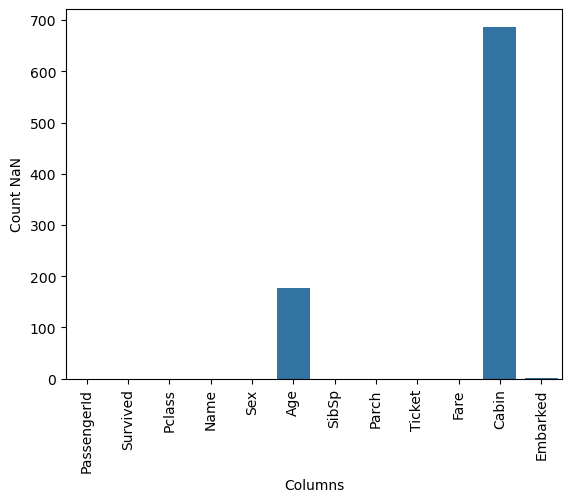

In [245]:
# Plotting the missing values for each column
sns.barplot(x = df.isna().sum().index, y = df.isna().sum().values)
plt.xlabel("Columns")
plt.ylabel("Count NaN")
plt.xticks(rotation = 90)
plt.show()

#### Handling missing values for the column: Age

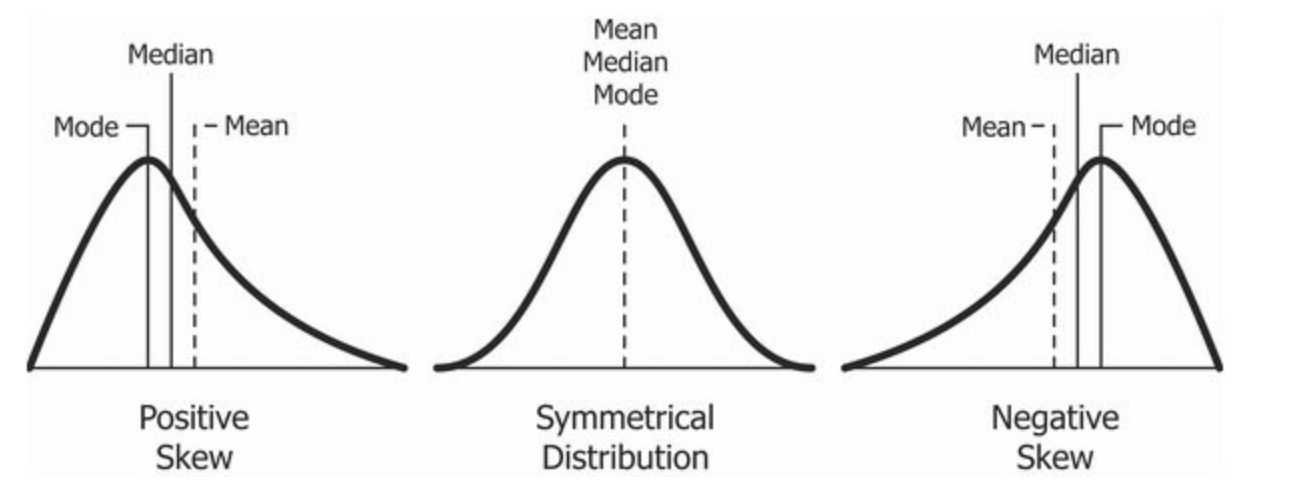

<b>Rule:</b> The simpleset way we can fill in NaN values in a numerical column is by using the mean value. But, in sekewed distributions (positive/right skew and negative/left skew), it is not recommended to fill in the nan values because the mean value is sensitive to outliers, instead we fill in the nan values using median in skewed distributions

<AxesSubplot:>

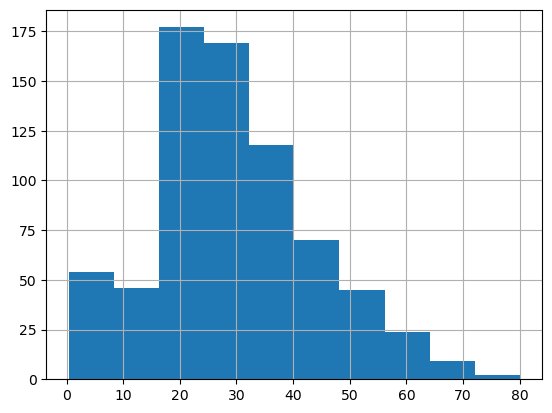

In [246]:
# Plotting the histogram graph for Age using pandas dataframe method hist()
df.Age.hist()

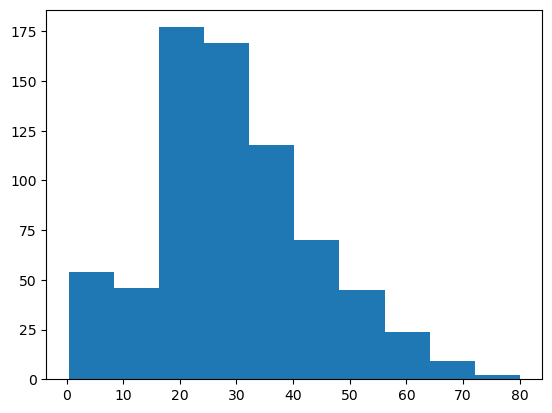

In [247]:
# Plotting the histogram graph for Age using matplotlib library
plt.hist(df.Age)
plt.show()

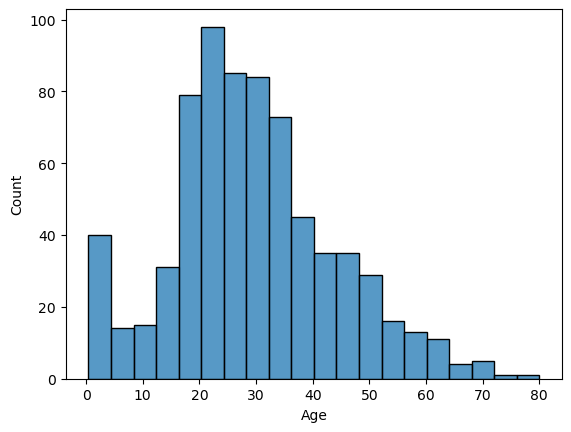

In [248]:
# Plotting the histogram graph for Age using seaborn library
sns.histplot(df.Age)
plt.show()

<AxesSubplot:ylabel='Age'>

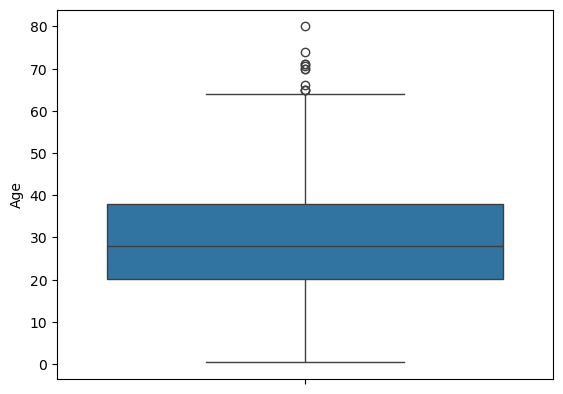

In [249]:
# Plotting the boxplot for Age
sns.boxplot(df.Age)

In [250]:
age_mean = df.Age.mean()
age_median = df.Age.median()
print("Age mean is ", age_mean, " and median is ", age_median)

Age mean is  29.69911764705882  and median is  28.0


In [251]:
# Fill in NaN values in Age using the median value
df.Age.fillna(value = df.Age.median(), inplace = True) # inplace = True, to apply the modification on the column Age

In [252]:
df.Age.isna().sum()

0

#### Handling missing values for the column: Cabin

In [253]:
ratio_nan_cabin = (df.Cabin.isna().sum()/len(df)) * 100
print("The ration of NaN values in Cabin column is ", ratio_nan_cabin)

The ration of NaN values in Cabin column is  77.10437710437711


<b>Rule:</b> If there is more than 60-70 % of missing values (NaN), we consider dropping that column

In [254]:
df.drop(columns = 'Cabin', inplace = True)

In [255]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
832,833,0,3,"Saad, Mr. Amin",male,28.0,0,0,2671,7.2292,C
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S
815,816,0,1,"Fry, Mr. Richard",male,28.0,0,0,112058,0.0000,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C


#### Handling missing values for the column: Embark

In [256]:
# Counting the sum of missing values in Embarked column
df.Embarked.isna().sum()

2

In [257]:
# Embarked is a categorical column, values_counts() returns the number of occurences for each value
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<b>Note:</b> Generally, the simplest way to fill in the missing values in categorical column is by using the most frequent value. 

In [258]:
df.Embarked.fillna(value = df.Embarked[0], inplace=True)

In [259]:
df.Embarked.isna().sum()

0

In [260]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Exploratory Data Analysis (EDA): Univariate, Bivariate, and Multivariate Analysis

In [261]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,C


In [262]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Column: Age

#### Univariate Non-graphical

In [263]:
age_mean = np.mean(df.Age)
age_median = np.median(df.Age)
age_mode = df.Age.mode()

In [264]:
print("Age mean: ", age_mean)
print("Age median: ", age_median)
print("Age mode: ", age_mode)

Age mean:  29.36158249158249
Age median:  28.0
Age mode:  0    28.0
Name: Age, dtype: float64


#### Univariate Graphical

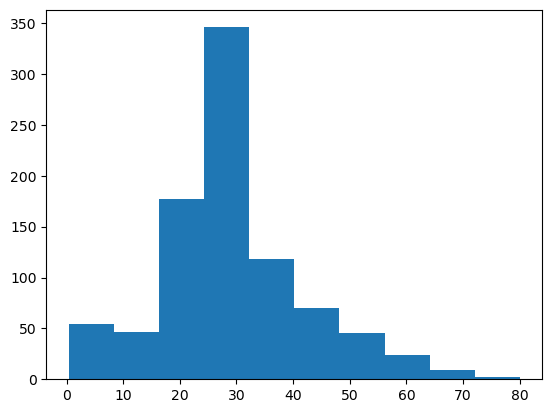

In [265]:
# Plotting the histogram
plt.hist(df.Age)
plt.show()

<AxesSubplot:ylabel='Age'>

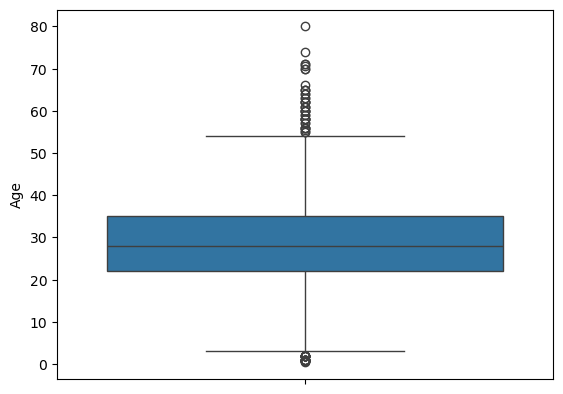

In [266]:
# Plotting the boxplot
sns.boxplot(df.Age)

#### Column: Fare (Ticket price)

#### Univariate Non-graphical

In [267]:
fare_mean = np.mean(df.Fare)
fare_median = np.median(df.Fare)
fare_mode = df.Fare.mode()

In [268]:
print("Fare mean: ", fare_mean)
print("Fare median: ", fare_median)
print("Fare mode: ", fare_mode)

Fare mean:  32.204207968574636
Fare median:  14.4542
Fare mode:  0    8.05
Name: Fare, dtype: float64


#### Univariate Graphical

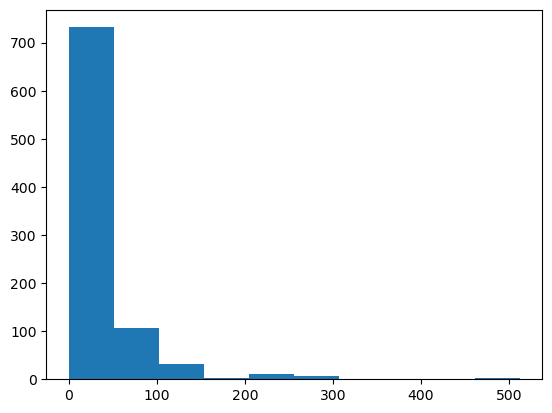

In [269]:
# Plotting the histogram
plt.hist(df.Fare)
plt.show()

<AxesSubplot:ylabel='Fare'>

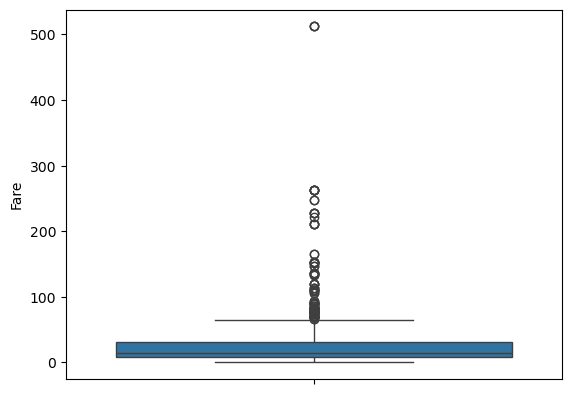

In [270]:
# Plotting the boxplot
sns.boxplot(df.Fare)

#### Column: Pclass

#### Univariate Non-graphical

In [271]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### Univariate Graphical

<AxesSubplot:xlabel='Pclass'>

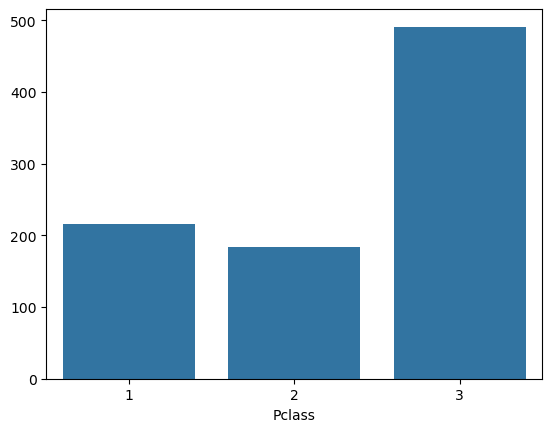

In [272]:
# Plotting the barplot of the categorical column Pclass
sns.barplot(x = df.Pclass.value_counts().index, y = df.Pclass.value_counts().values)

#### Column: Survived

#### Univariate Non-Graphical

In [273]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Univariate Graphical

<AxesSubplot:xlabel='Survived'>

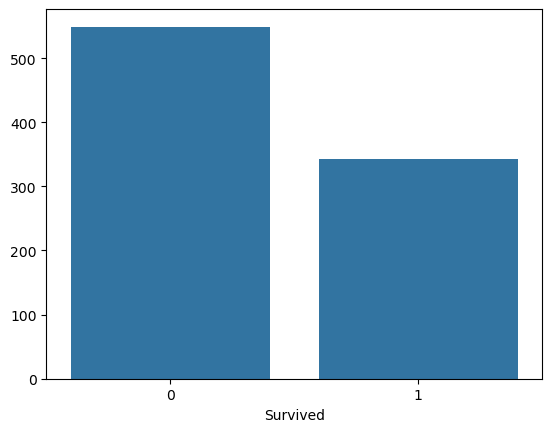

In [274]:
# Plotting the barplot of the categorical column Survived
sns.barplot(x = df.Survived.value_counts().index, y = df.Survived.value_counts().values)

#### Bivariate Analysis

#### Age Column VS. Survived Column

#### Non-Graphical

In [275]:
df.groupby(by=["Survived"])['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

In [276]:
df.groupby(by=["Survived"])['Age'].median()

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

#### Graphical

<AxesSubplot:xlabel='Age', ylabel='Count'>

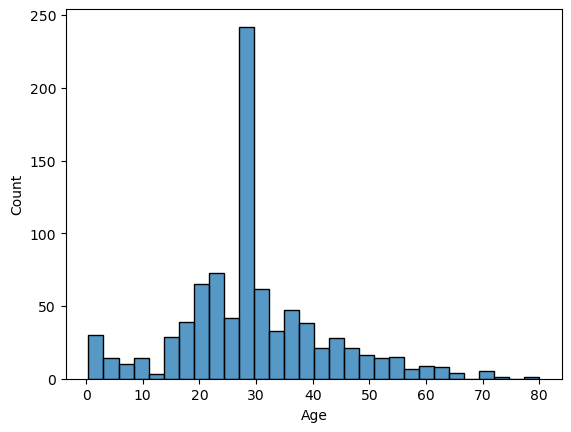

In [277]:
sns.histplot(data = df, x = df.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

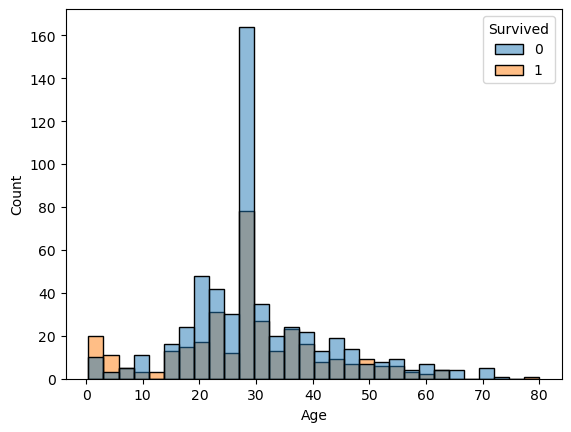

In [278]:
sns.histplot(data = df, x = df.Age, hue=df.Survived)

<AxesSubplot:ylabel='Age'>

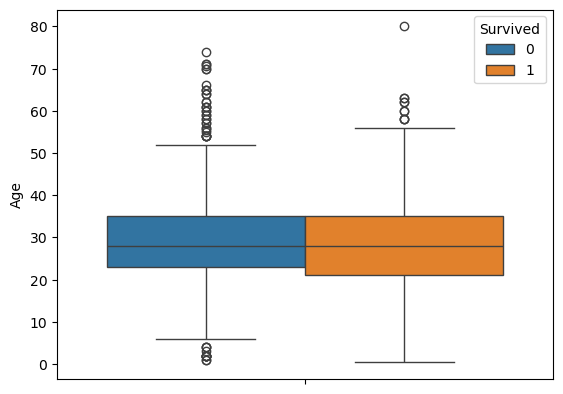

In [279]:
sns.boxplot(y = df.Age, hue=df.Survived)

##### Multivariate Analysis

In [280]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

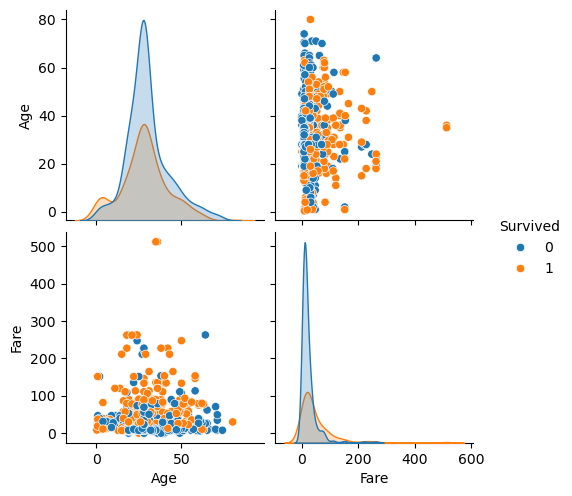

In [281]:
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived', diag_kind='kde')

### Feature Engineering

#### Encoding Categorical Columns

In [282]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [283]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [284]:
df[categorical_columns]

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


<b>Note:</b> In our case, we distinguish three types of encoding:
<ul>
    <li><b>One hot encoding:</b> In one-hot encoding, each category is represented as a binary vector. For a categorical feature with 'n' unique values, it creates 'n' binary columns. Each observation has a 1 in the column corresponding to its category and 0 in all other columns.</li>
    <li><b>Dummy encoding:</b>It is the same as one hot encoding except that it creates n-1 binary columns instead of n</li>
    <li><b>Label encoding</b> We assign a unique ID for each of the values we have</li>
</ul>

In [285]:
pd.get_dummies(df.Sex)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [286]:
pd.get_dummies(df.Sex, drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [287]:
df['IsMale?'] = pd.get_dummies(df.Sex, drop_first=True, dtype='int')

In [288]:
pd.get_dummies(df.Embarked, drop_first=True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [289]:
df[['Embarked_Q', 'Embarked_S']] = pd.get_dummies(df.Embarked, drop_first=True, dtype='int')

In [290]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsMale?,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [291]:
# Let's drop the columns: PassengerId, Name, Sex, Ticket, and Embarked
df.drop(columns = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], inplace=True)

In [292]:
df.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale?,Embarked_Q,Embarked_S
402,0,3,21.0,1,0,9.8250,0,0,1
694,0,1,60.0,0,0,26.5500,1,0,1
186,1,3,28.0,1,0,15.5000,0,1,0
667,0,3,28.0,0,0,7.7750,1,0,1
852,0,3,9.0,1,1,15.2458,0,0,0
588,0,3,22.0,0,0,8.0500,1,0,1
45,0,3,28.0,0,0,8.0500,1,0,1
369,1,1,24.0,0,0,69.3000,0,0,0
386,0,3,1.0,5,2,46.9000,1,0,1
722,0,2,34.0,0,0,13.0000,1,0,1


<b>Note:</b> There are other feature engineering techniques such as, handling outliers, feature scaling, ...etc. But, we keep it simple for the moment

### Models Development

In [293]:
# Features and target
features = df.drop('Survived', axis = 1)
target = df.Survived

In [294]:
features

,Pclass,Age,SibSp,Parch,Fare,IsMale?,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,28.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [295]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [296]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)

In [297]:
X_train

,Pclass,Age,SibSp,Parch,Fare,IsMale?,Embarked_Q,Embarked_S
445,1,4.0,0,2,81.8583,1,0,1
650,3,28.0,0,0,7.8958,1,0,1
172,3,1.0,1,1,11.1333,0,0,1
450,2,36.0,1,2,27.7500,1,0,1
314,2,43.0,1,1,26.2500,1,0,1
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,0,0,1
270,1,28.0,0,0,31.0000,1,0,1
860,3,41.0,2,0,14.1083,1,0,1
435,1,14.0,1,2,120.0000,0,0,1


In [298]:
X_test

,Pclass,Age,SibSp,Parch,Fare,IsMale?,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,1,0,0
439,2,31.0,0,0,10.5000,1,0,1
840,3,20.0,0,0,7.9250,1,0,1
720,2,6.0,0,1,33.0000,0,0,1
39,3,14.0,1,0,11.2417,0,0,0
...,...,...,...,...,...,...,...,...
821,3,27.0,0,0,8.6625,1,0,1
633,1,28.0,0,0,0.0000,1,0,1
456,1,65.0,0,0,26.5500,1,0,1
500,3,17.0,0,0,8.6625,1,0,1


In [299]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [300]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

##### Logistic Rergession

In [301]:
mdl_LR = LogisticRegression(max_iter = 1000)

In [302]:
mdl_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [303]:
y_pred_LR = mdl_LR.predict(X_test)

In [304]:
print("Accuracy: ", accuracy_score(y_test, y_pred_LR))
print("Precision: ", precision_score(y_test, y_pred_LR))
print("Recall: ", recall_score(y_test, y_pred_LR))

Accuracy:  0.8097014925373134
Precision:  0.7941176470588235
Recall:  0.7297297297297297


In [305]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



<AxesSubplot:>

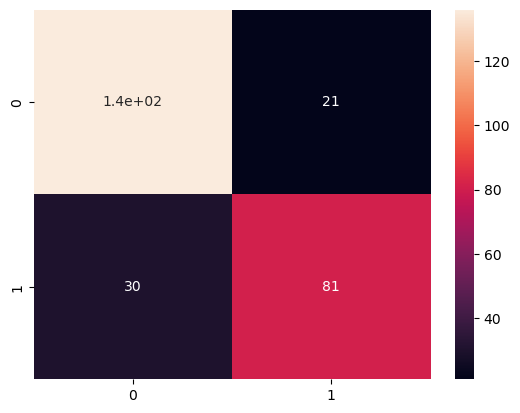

In [306]:
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot = True)

In [307]:
# Caculate ROC curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_LR)
# Calculate AUC 
roc_auc_LR = auc(fpr_LR, tpr_LR)

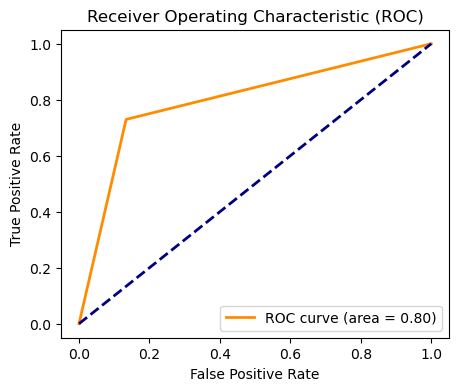

In [308]:
# Plotting the ROC AUC Curve
plt.figure(figsize=(5, 4))
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree Classifier

In [309]:
mdl_DT = DecisionTreeClassifier()

In [310]:
mdl_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [311]:
y_pred_DT = mdl_DT.predict(X_test)

In [312]:
print("Accuracy: ", accuracy_score(y_test, y_pred_DT))
print("Precision: ", precision_score(y_test, y_pred_DT))
print("Recall: ", recall_score(y_test, y_pred_DT))

Accuracy:  0.7425373134328358
Precision:  0.6875
Recall:  0.6936936936936937


In [313]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.69      0.69      0.69       111

    accuracy                           0.74       268
   macro avg       0.73      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



<AxesSubplot:>

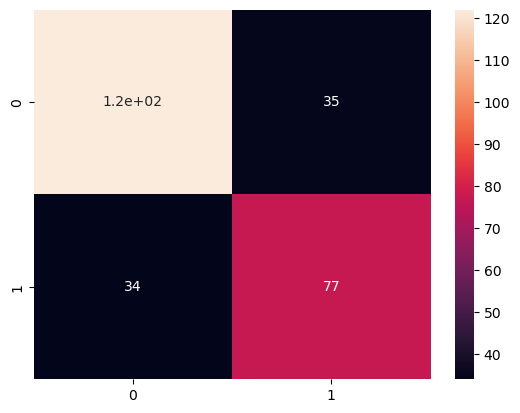

In [314]:
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot = True)

In [315]:
# Caculate ROC curve
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_pred_DT)
# Calculate AUC 
roc_auc_DT = auc(fpr_DT, tpr_DT)

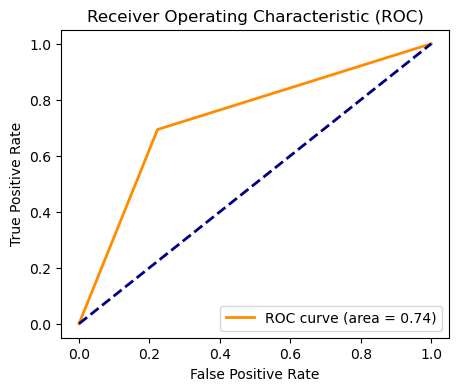

In [316]:
# Plotting the ROC AUC Curve
plt.figure(figsize=(5, 4))
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()